<h1 style="text-align: center;">Desafío 1 - Determinantes del ingreso</h1>

## Preliminares
### Decripción del problema
- Usted trabaja para un organismo no gubernamental que está interesado en las dinámicas socioeconómicas que determinan la desigualdad de ingreso y la erradicación de la pobreza
extrema, enmarcado dentro de los objetivos del desarrollo del nuevo milenio del Programa de las Naciones Unidas para el Desarrollo.
- Le encomiendan el desarrollo de un modelo predictivo sobre la probabilidad que un individuo presente salarios por sobre o bajo los 50.000 dólares anuales, en base a una serie de
atributos sociodemográficos.

### Objetivos
- Encontrar un modelo predictivo que permita determinar la probabilidad de que una persona presenta salarios sobre los 50.000 dólares anuales, basado en ciertos actributos que influyen en esta probabilidad.

### Desarrollo

- El vector objetivo es la celda income la cuál se pretenden predecir en probabilidad. Cómo es una dato binario, se trata de un problema de clasificiación.
- Preprosesamiento: 
    - Cambiar signos por nulos
    - Determinar qué datos o qué columna eliminar en base a la cantidad de nulos.
    - Recodificación de variables según lo señala el problema. 
    - Recategorización de variables: Establacer valores numéricos binarios,    

- Modelo a utilizar: regresión logística ya que el vector objetivo es binario
- Determinar variables significativas:
    - Correr modelo de regresión logística
    - Depurar las variables: Dejar variables significativas a través de pValue 
    - Se simplifica el modelo, se entrena el modelo logistico con estas variables.
-Entrenamiento:
    - Entrenamiento supervizado con división de data set para entrenamiento y pruebas.
- Revisión modelo: puntaje f1, accuracy. 
- Evaluación del desempeño del modelo reducido versus al total con log verosimilitud.
- Matriz de confusión y luego se calcula la precisión para determinar qué tan bueno está el modelo y si hace lo que estamos necesitando.
- Curva Roc, permite evaluar el rango de error del modelo y la relación entre falsos positivios y falsos negativos. 
- Variación del modelo para ajustar su desempeño.

### Librerías a usar

- pandas y numpy: para trabajar el dataframe, manejar y convertir los datos. Analizar a grandes rasgos la caracteristica de las variables.
- seaborn y matplotlib: Para obtener distintos gráficos que nos permitan analizar el comportamiento y correlación de las variables.
- statsmodel: analizar comportamiento estadístico, determinación de variables significativas y creación del modelo
- sklearn: librería de machine learning para entrenar el modelo descrito, estandarizar y utilización de métricas para evaluar calidad del modelo. 
- warning: Librería que permite eliminar mensajes no desedos respecto a las deprecación
- funciones propias: Archivo con funciones propias para automatizar procesos comunes.




##  Anáilisis descriptivo
A continuación se realiza la inspección visual del vector objetivo y de las variables independientes para realizar un análisis descriptivo de las mismas, determinar su tipo y la manera en que se distribuyen.

In [2]:
# Se importan las librerías a utilizad

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msgno 

plt.style.use('seaborn')

# Importación del DataFrame de datos: 

df = pd.read_csv('../data/income-db.csv')
df.head()


,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


<AxesSubplot:>

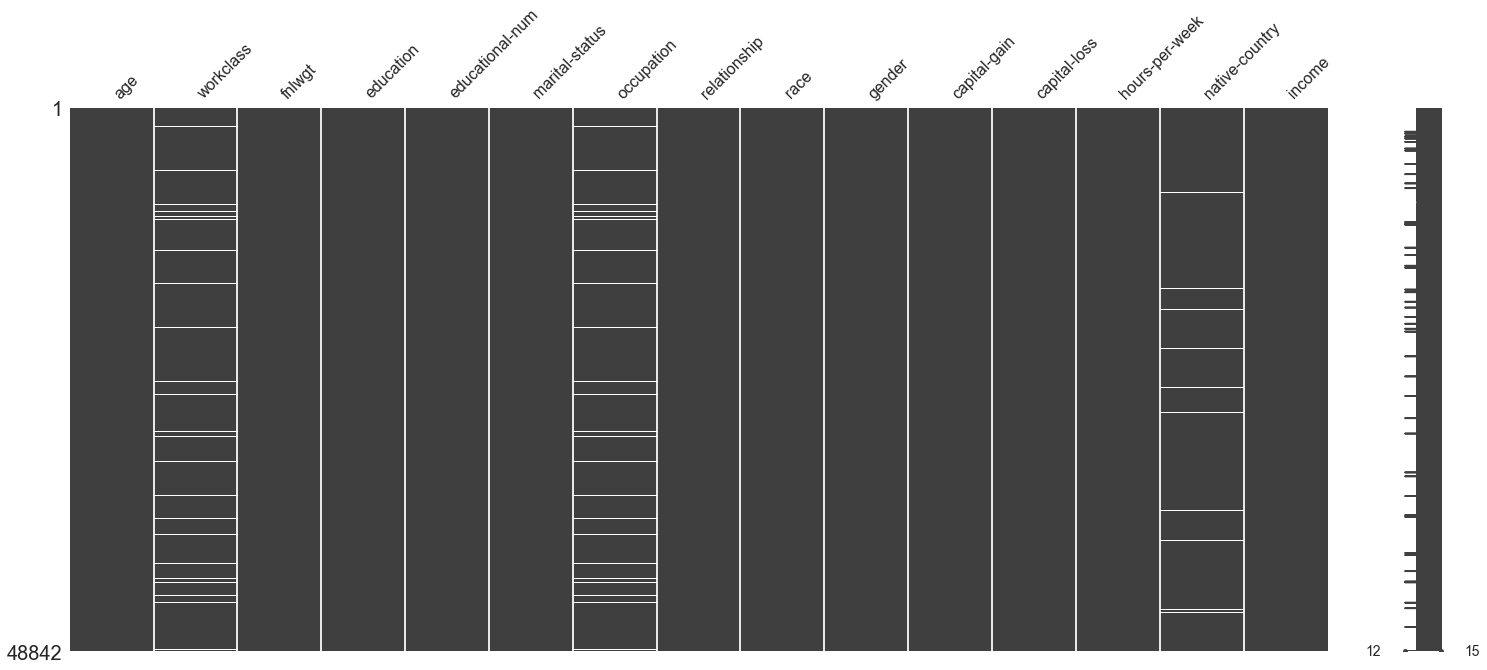

In [3]:
# Se reemplazan los valores que contengan el signo '?' ya que estos representan datos perdidos a valor NaN. 
df = df.replace('?', np.nan)
msgno.matrix(df) # Se muestra un esquema con los datos NaN para observarlos y decidir qué hacer con esa columna.

In [4]:
# Las columnas workclass, occupation y native-counrty presentan datos perdidos

df_len = len(df)

for col in ['workclass','occupation','native-country']:
    nans = df[col].isna().sum()
    print(f' La columna {col} presenta {nans} datos perdidos y representa el {round(100*nans/df_len,3)}% del total de datos')

 La columna workclass presenta 2799 datos perdidos y representa el 5.731% del total de datos
 La columna occupation presenta 2809 datos perdidos y representa el 5.751% del total de datos
 La columna native-country presenta 857 datos perdidos y representa el 1.755% del total de datos


<AxesSubplot:>

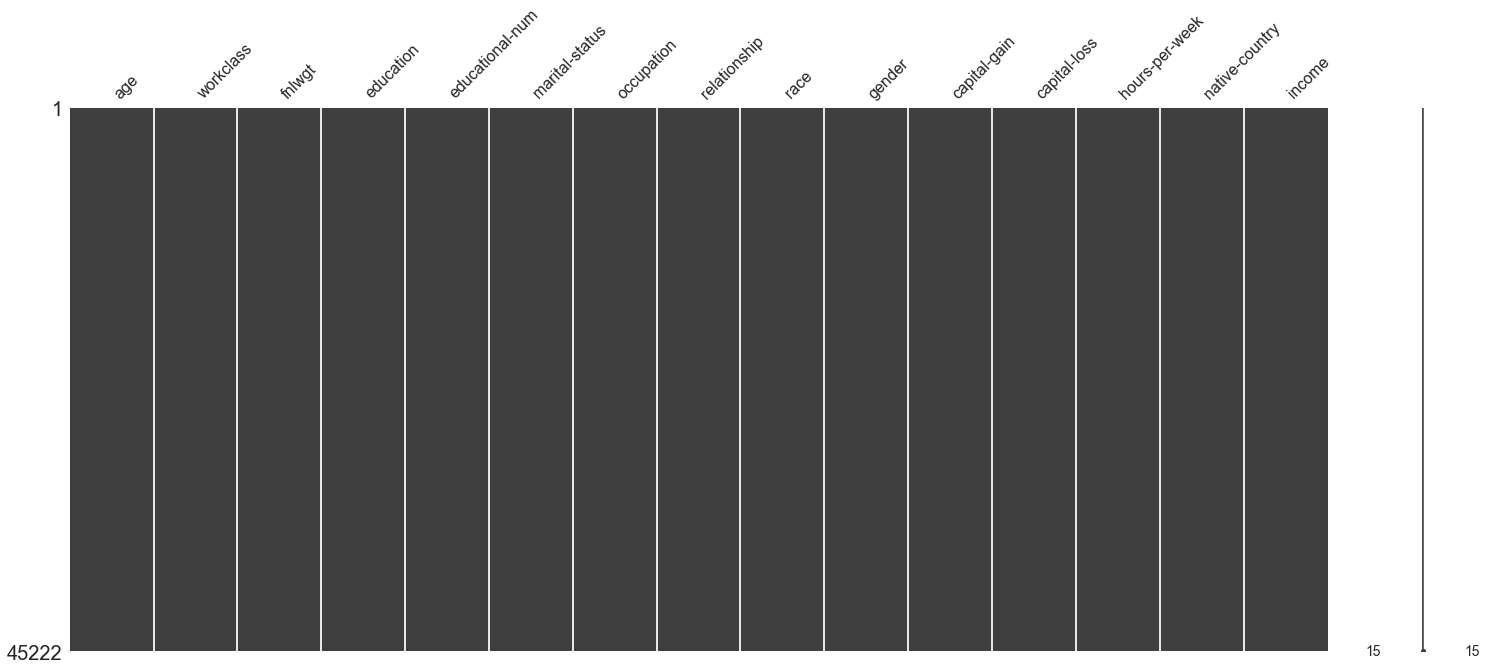

In [5]:
# Limpieza da datos perdidos: Se eliminan los datos perdidos y se continúa con todas las columnas ya que no representan un gran porcentaje del total. 
df = df.dropna()
msgno.matrix(df)

### Visualización de los datos
A continuación se realiza la visualización de cada columna y la del vector objetivo con el objetivo de analizar su distribución y comportamiento según el tipo de dato.

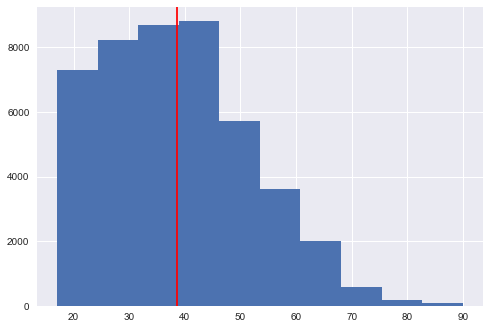

In [6]:
plt.hist(df['age'])
plt.axvline(df['age'].mean(), color = 'Red');

(array([3.3307e+04, 3.1000e+03, 0.0000e+00, 3.7960e+03, 0.0000e+00,
        1.4060e+03, 1.9460e+03, 0.0000e+00, 1.6460e+03, 2.1000e+01]),
 array([0. , 0.6, 1.2, 1.8, 2.4, 3. , 3.6, 4.2, 4.8, 5.4, 6. ]),
 <BarContainer object of 10 artists>)

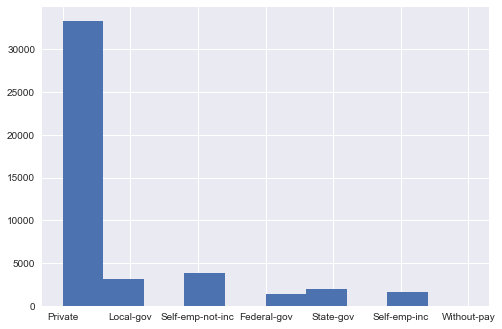

In [7]:
plt.hist(df['workclass'])

(array([1.8701e+04, 2.0916e+04, 4.8030e+03, 6.0400e+02, 1.4000e+02,
        3.2000e+01, 1.2000e+01, 7.0000e+00, 3.0000e+00, 4.0000e+00]),
 array([  13492. ,  161182.8,  308873.6,  456564.4,  604255.2,  751946. ,
         899636.8, 1047327.6, 1195018.4, 1342709.2, 1490400. ]),
 <BarContainer object of 10 artists>)

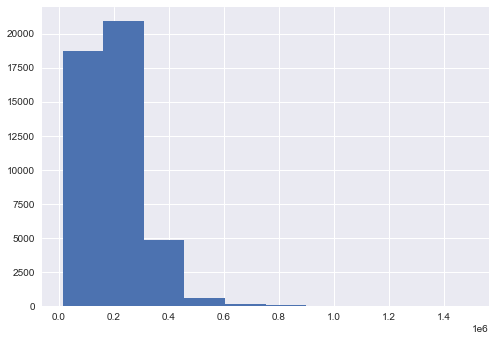

In [8]:
plt.hist(df['fnlwgt'])

(array([16402.,  1507., 11122.,   785.,  8393.,  2514.,  2408.,   676.,
         1121.,   294.]),
 array([ 0. ,  1.5,  3. ,  4.5,  6. ,  7.5,  9. , 10.5, 12. , 13.5, 15. ]),
 <BarContainer object of 10 artists>)

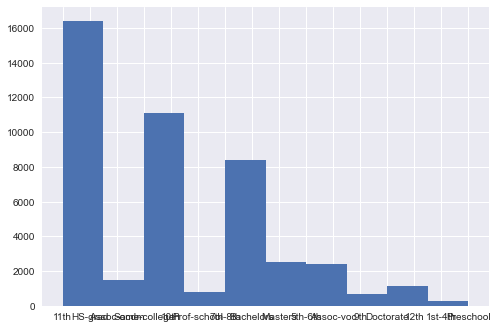

In [9]:
plt.hist(df['education'])

(array([  294.,   449.,  1499.,  1223.,  2196., 14783., 11858.,  1507.,
        10084.,  1329.]),
 array([ 1. ,  2.5,  4. ,  5.5,  7. ,  8.5, 10. , 11.5, 13. , 14.5, 16. ]),
 <BarContainer object of 10 artists>)

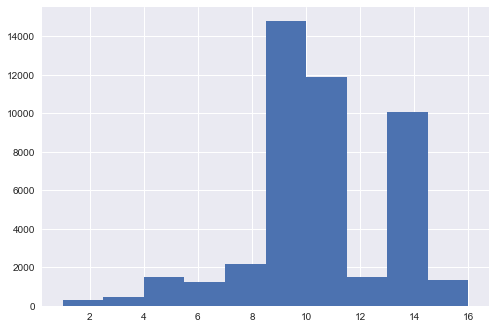

In [10]:
plt.hist(df['educational-num'])   

(array([14598., 21055.,     0.,  1277.,     0.,  1411.,  6297.,     0.,
          552.,    32.]),
 array([0. , 0.6, 1.2, 1.8, 2.4, 3. , 3.6, 4.2, 4.8, 5.4, 6. ]),
 <BarContainer object of 10 artists>)

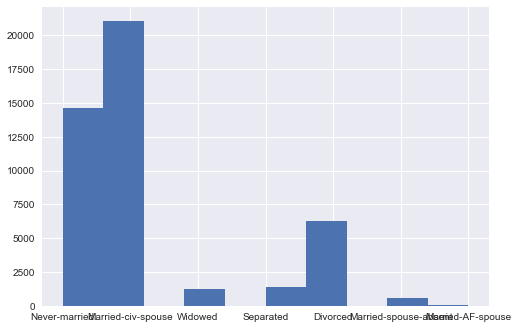

In [12]:
plt.hist(df['marital-status'])   

In [ ]:
1/(1+ np.exp(-0.5315+2*0.0780+0.1039))

0.5674856603872683